In [1]:
import numpy as np

import time
import sys

from matplotlib import pyplot as plt

In [2]:
# Run the moment expansion!
from LPT.moment_expansion_fftw import MomentExpansion

# we scale the z = 0 power spectrum given to give z = 0.8 results
z, D, f = 0.8, 0.6819, 0.8076
k, p = np.loadtxt('pk.dat').T

t1 = time.time()
moments = MomentExpansion(k, D**2 * p, beyond_gauss = False, one_loop= True, import_wisdom=True, wisdom_file='./wisdom.npy',\
                        kmin = 1e-2, kmax = 0.5, nk = 100,
                        cutoff=10, extrap_min = -4, extrap_max = 3, N = 2000, threads=1, jn=10, shear=True)
t2 = time.time()
print(t2-t1)

10.659373044967651


In [3]:
# this saves a file called "wisdom.npy" that speeds up fftw if running for first time
moments.export_wisdom('./wisdom.npy')

In [4]:
moments.pktable.shape

(100, 12)

In [5]:
# Extract the Velocity Statistics First for a sample set of bias parameters
# Parameters chosen to match the plots in the paper.

# These are, in order
# b1, b2, bs, b3: linear quadratic parameters
# alpha, alphav, alpha_s0, alpha_s2: one-loop counterterms for each component of the velocity moments
# sn, sv, s0: stochastic contributions to power spectrum, 1st, and 2nd moments


pars = [0.70, -1.3, -0.06, 0,  7.4, -17., 8.9, 3.1, 1.9e3, -4.2e3, -670]
b1, b2, bs, b3, alpha, alpha_v, alpha_s0, alpha_s2, sn, sv, s0 = pars 


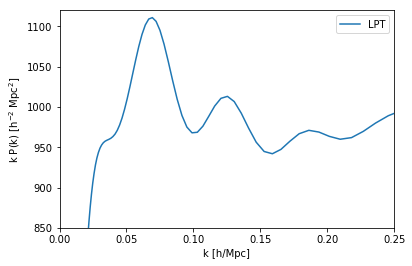

In [6]:
# The (real space) power spectrum:
kv, pth = moments.combine_bias_terms_pk(b1, b2, bs, b3, alpha, sn)
plt.semilogx( kv, kv * pth,label=r'LPT' )

plt.legend()
plt.xscale('linear')

plt.xlim(0,0.25)
plt.ylim(850,1120)

plt.ylabel(r'k P(k) [h$^{-2}$ Mpc$^2$]')
plt.xlabel('k [h/Mpc]')
plt.show()

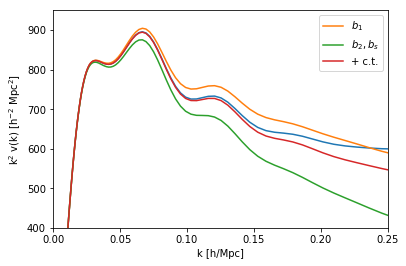

In [7]:
# the 1st pairwise velocity moment
kv, vth = moments.combine_bias_terms_vk(b1, b2, bs, b3, alpha_v, sv)
plt.semilogx( kv, -f*kv**2 * vth )

kv, vth = moments.combine_bias_terms_vk(b1, 0, 0, 0, 0, 0)
plt.semilogx( kv, -f*kv**2 * vth, label=r'$b_1$' )

kv, vth = moments.combine_bias_terms_vk(b1, b2, bs, b3, 0, 0)
plt.semilogx( kv, -f*kv**2 * vth, label=r'$b_2, b_s$' )

kv, vth = moments.combine_bias_terms_vk(b1, b2, bs, b3, alpha_v, 0)
plt.semilogx( kv, -f*kv**2 * vth, label=r'+ c.t.' )


plt.legend(loc='upper right')
plt.ylabel(r'k$^2$ v(k) [h$^{-2}$ Mpc$^2$]')

plt.xscale('linear')
plt.xlim(0,0.25)
plt.ylim(400,950)

plt.xlabel('k [h/Mpc]')
plt.show()


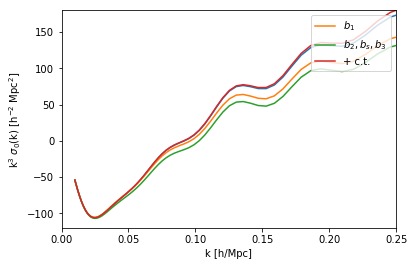

In [8]:
# the 2nd pairwise velocity moment, monopole
# Note that the default basis is polynomial in mu for rsd convenience
# but for velocities only better to look at Legendre (multipole) basis

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, b2, bs, b3, alpha_s0, alpha_s2, s0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s0th )

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, 0, 0, 0, 0, 0, 0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s0th, label=r'$b_1$' )

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, b2, bs, b3, 0, 0, 0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s0th, label=r'$b_2, b_s, b_3$' )

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, b2, bs, b3, alpha_s0, alpha_s2, 0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s0th, label=r'+ c.t.' )


plt.legend(loc='upper right')
plt.ylabel(r'k$^3$ $\sigma_0$(k) [h$^{-2}$ Mpc$^2$]')

plt.xscale('linear')
plt.xlim(0,0.25)
plt.ylim(-120,180)

plt.xlabel('k [h/Mpc]')
plt.show()


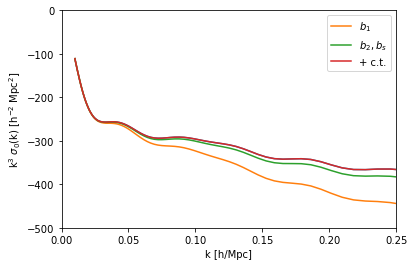

In [ ]:
# the 2nd pairwise velocity moment, quadrupole
kv, s0th, s2th = moments.combine_bias_terms_sk(b1, b2, bs, b3, alpha_s0, alpha_s2, s0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s2th )

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, 0, 0, 0, 0, 0, 0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s2th, label=r'$b_1$' )

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, b2, bs, b3, 0, 0, 0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s2th, label=r'$b_2, b_s$' )

kv, s0th, s2th = moments.combine_bias_terms_sk(b1, b2, bs, b3, alpha_s0, alpha_s2, 0, basis='Legendre')
plt.semilogx( kv, f**2*kv**3 * s2th, label=r'+ c.t.' )


plt.legend(loc='upper right')
plt.ylabel(r'k$^3$ $\sigma_0$(k) [h$^{-2}$ Mpc$^2$]')

plt.xscale('linear')
plt.xlim(0,0.25)
plt.ylim(-500,0)

plt.xlabel('k [h/Mpc]')
plt.show()

In [ ]:
# Now combine into wedges via the moment expansion
plt.figure(figsize=(8,5))

mus = [0.1, 0.3, 0.5, 0.7, 0.9]


for ii, mu in enumerate(mus):
    
    # The c3 parameter is the counterterm ansatz to the third moment
    # Note that c3 enters as c3 / 6 * k^2 mu^4 P(k)
    kw, pw = moments.compute_redshift_space_power_at_mu(pars,f,mu,counterterm_c3=-120)
    plt.plot(kw, kw*pw,'C'+str(ii)+'-',label=r'$\mu = %.1f$'%(mu))
    
    kw, pw = moments.compute_redshift_space_power_at_mu(pars,f,mu,counterterm_c3=0)
    plt.plot(kw, kw*pw,'C'+str(ii)+'--')

plt.plot(kw, -1000*kw, 'k--', label='n = 2')    
    
plt.ylabel(r'$k P(k,\mu)$ [(Mpc/h)$^2$]')


plt.xlim(0,0.25)
plt.ylim(500,2000)

plt.legend(ncol=3,loc='lower right')



plt.show()

In [ ]:
# ... and multipoles
plt.figure(figsize=(8,5))

ks, p0g, p2g, p4g = moments.compute_redshift_space_power_multipoles(pars,f,counterterm_c3=-120)
ks, p0, p2, p4 = moments.compute_redshift_space_power_multipoles(pars,f,counterterm_c3=0)

plt.plot(ks, -1000*ks,'k--',label='n=2')
plt.plot(ks, -1000*ks,'k-',label='+ c.t.')


plt.plot(ks, ks*p0,'C0-',label=r'$\ell = 0$')
plt.plot(ks, ks*p0g,'C0--')

plt.plot(ks, ks*p2,'C1-',label=r'$\ell = 2$')
plt.plot(ks, ks*p2g,'C1--')

plt.plot(ks, ks*p4,'C2-',label=r'$\ell = 4$')
plt.plot(ks, ks*p4g,'C2--')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell(k)$ [(Mpc/h)$^2$]')

plt.xlim(0,0.25)
plt.ylim(0,1600)

plt.legend(ncol=3,loc='upper right')

plt.show()

In [ ]:
# Note that we can also enter a more reduced set of parameters using the "reduced" keyword
# These are:
# the bias parameters b1, b2, bs
# the counterterms alpha0, alpha2, alpha4,
# and the stochastic contributions sn, s0
# In this case the "counterterm_c3" parameters is unused because it is subsumed by alpha4

# As an example let's take:
pars = [0.7, 0.5, -0.3, 0, 10, 20, -60, 1800, -1000]

# Now combine into wedges via the moment expansion...
# Compared here to Kaiser x Real Space P(k), which is very different!

plt.figure(figsize=(8,5))

mus = [0.1, 0.3, 0.5, 0.7, 0.9]


for ii, mu in enumerate(mus):
    
    kw, pw = moments.compute_redshift_space_power_at_mu(pars,f,mu,reduced=True)
    plt.plot(kw, kw*pw,'C'+str(ii)+'-',label=r'$\mu = %.1f$'%(mu))
    
    kw, pw = moments.compute_redshift_space_power_at_mu(pars,f,0,reduced=True)
    plt.plot(kw, kw *( (1 + pars[0] + f*mu**2)**2 / (1 + pars[0])**2 * (pw-pars[7]) + pars[7]),'C'+str(ii)+'--')
    
plt.plot(kw, -1000*kw, 'k--',label='Kaiser')
plt.ylabel(r'$k P(k,\mu)$ [(Mpc/h)$^2$]')


plt.xlim(0,0.25)
plt.ylim(500,2100)

plt.legend(ncol=3,loc='lower right')



plt.show()


In [ ]:
# and similarly for multipoles:

plt.figure(figsize=(8,5))

ks, p0, p2, p4 = moments.compute_redshift_space_power_multipoles(pars,f,reduced=True)


plt.plot(ks, ks*p0,'C0-',label=r'$\ell = 0$')

plt.plot(ks, ks*p2,'C1-',label=r'$\ell = 2$')

plt.plot(ks, ks*p4,'C2-',label=r'$\ell = 4$')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell(k)$ [(Mpc/h)$^2$]')

plt.xlim(0,0.25)
plt.ylim(0,1600)

plt.legend(ncol=3,loc='upper right')

plt.show()
